In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
import os
import cv2

Matplotlib is building the font cache; this may take a moment.


In [3]:
path = os.listdir('tumor/training/')
classes = {'no':0, 'yes':1}

In [4]:
X = []
Y = []
for cls in classes:
    pth = 'tumor/training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [5]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [6]:
np.unique(Y)

array([0, 1])

In [7]:
pd.Series(Y).value_counts()

1    827
0    395
Name: count, dtype: int64

In [8]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

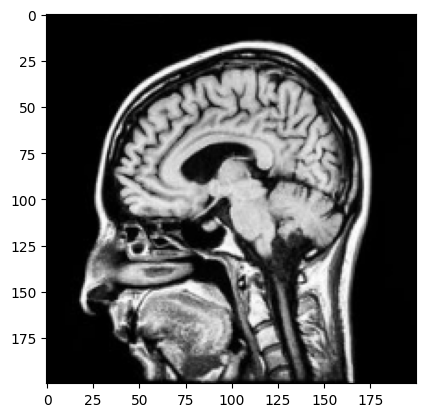

In [9]:
plt.imshow(X[5], cmap='gray')

In [10]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.4)

In [12]:
xtrain.shape, xtest.shape

((733, 40000), (489, 40000))

In [13]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
from xgboost import XGBClassifier
from sklearn.cluster import DBSCAN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Ridge
warnings.filterwarnings('ignore')

In [15]:
lgr = LogisticRegression(max_iter=1000)
lgr.fit(xtrain, ytrain)

with open('models/lgr.pkl', 'wb') as f:
    pickle.dump(lgr, f)


In [17]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)

with open('models/lr.pkl', 'wb') as f:
    pickle.dump(lr, f)

In [19]:
# pca = PCA()
# pca.fit(xtrain,ytrain)
# pca.
# with open('models/pca.pkl', 'wb') as f:
#     pickle.dump(pca, f)


In [20]:
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)

with open('models/rfc.pkl', 'wb') as f:
    pickle.dump(rfc, f)

In [21]:
dtc = DecisionTreeClassifier()
dtc.fit(xtrain, ytrain)

with open('models/dtc.pkl', 'wb') as f:
    pickle.dump(dtc, f)

In [22]:
gbc = GradientBoostingClassifier()
gbc.fit(xtrain, ytrain)

with open('models/gbc.pkl', 'wb') as f:
    pickle.dump(gbc, f)

In [23]:
xgb = XGBClassifier()
xgb.fit(xtrain, ytrain)

with open('models/xgb.pkl', 'wb') as f:
    pickle.dump(xgb, f)

In [48]:
dbscan = DBSCAN()
dbscan.fit(xtrain, ytrain)

with open('models/dbscan.pkl', 'wb') as f:
    pickle.dump(dbscan, f)

In [25]:
lda = LinearDiscriminantAnalysis()
lda.fit(xtrain, ytrain)

with open('models/lda.pkl', 'wb') as f:
    pickle.dump(lda, f)

In [26]:
knc = KNeighborsClassifier()
knc.fit(xtrain, ytrain)

with open('models/knc.pkl', 'wb') as f: 
    pickle.dump(knc, f)

In [27]:
knr = KNeighborsRegressor()
knr.fit(xtrain, ytrain)

with open('models/knr.pkl', 'wb') as f:
    pickle.dump(knr, f)

In [28]:
lso = Lasso()
lso.fit(xtrain, ytrain)

with open('models/lso.pkl', 'wb') as f:
    pickle.dump(lso, f)

In [29]:
mlpc = MLPClassifier()
mlpc.fit(xtrain, ytrain)

with open('models/mlpc.pkl', 'wb') as f:
    pickle.dump(mlpc, f)

In [30]:
rdg = Ridge()
rdg.fit(xtrain, ytrain)

with open('models/rdg.pkl', 'wb') as f:
    pickle.dump(rdg, f)

In [31]:
xgb.score(xtest, ytest)

0.9856850715746421

In [ ]:
pred = gbc.predict(xtest)
pred

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,

In [33]:
misclassified=np.where(ytest!=pred)
print(misclassified)
print("Total Misclassified Samples: ",len(misclassified[0]))

(array([ 31,  45,  87, 106, 129, 137, 162, 299, 318]),)
Total Misclassified Samples:  9


In [35]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

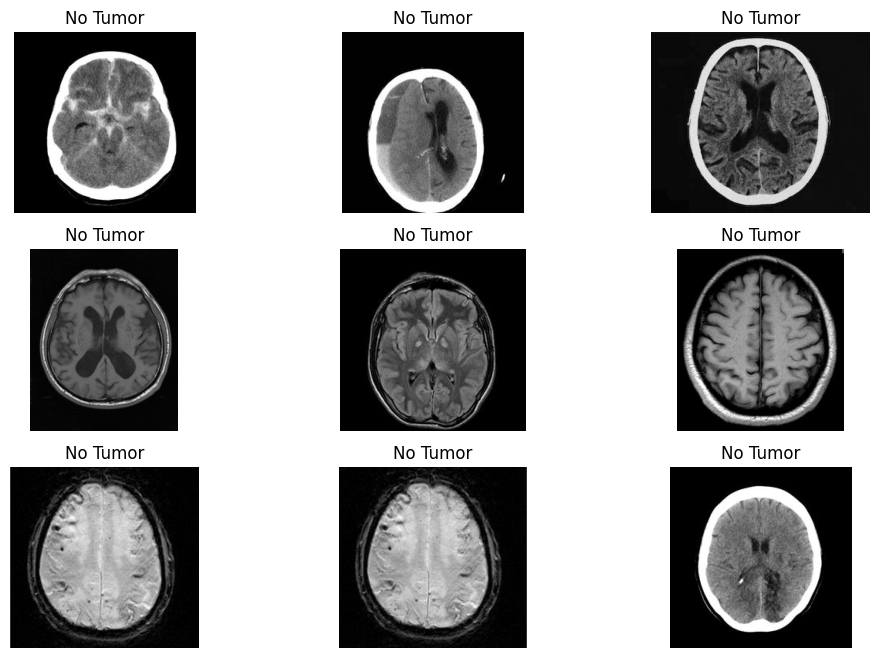

In [36]:
plt.figure(figsize=(12,8))
p = os.listdir('tumor/testing/')
c=1
for i in os.listdir('tumor/testing/no/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('tumor/testing/no/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

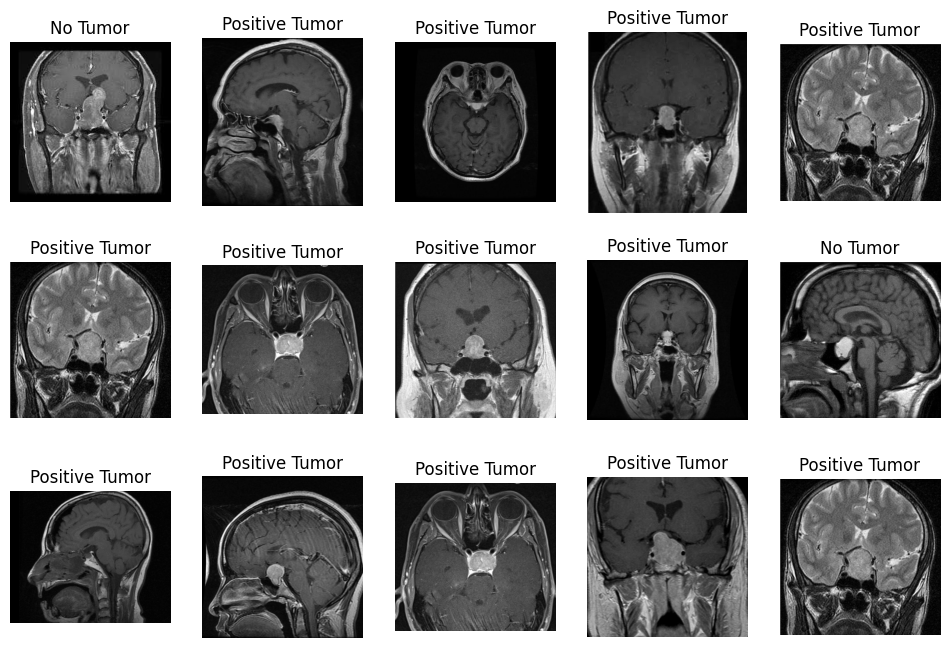

In [37]:
plt.figure(figsize=(12,8))
p = os.listdir('tumor/testing/')
c=1
for i in os.listdir('tumor/testing/yes/')[:15]:
    plt.subplot(3,5,c)
    
    img = cv2.imread('tumor/testing/yes/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = dtc.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [38]:
import pickle

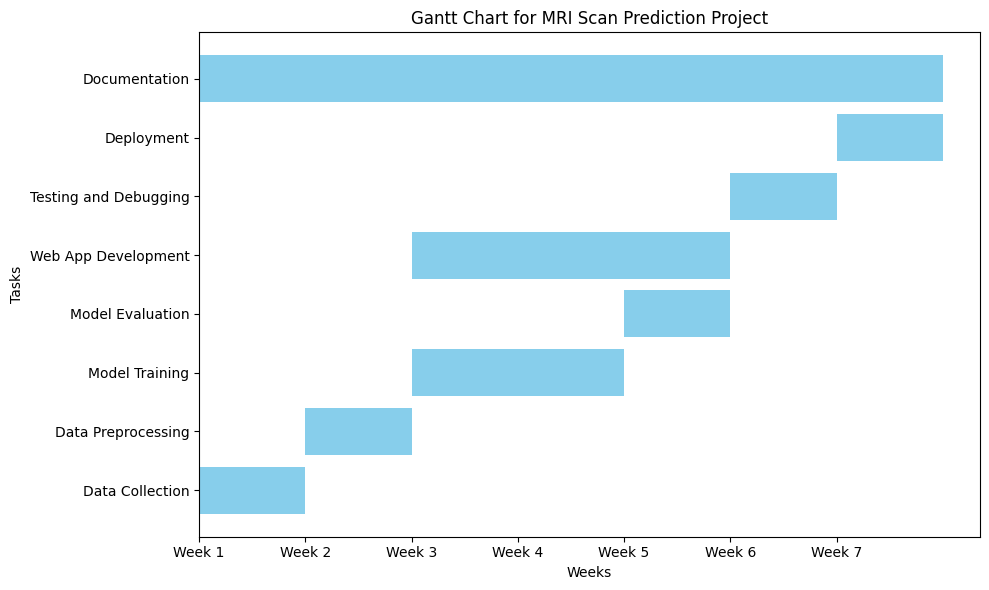

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the project tasks and their durations
tasks = {
    'Task': [
        'Data Collection', 
        'Data Preprocessing', 
        'Model Training', 
        'Model Evaluation', 
        'Web App Development', 
        'Testing and Debugging', 
        'Deployment', 
        'Documentation'
    ],
    'Start': [
        '2023-01-01', 
        '2023-01-08', 
        '2023-01-15', 
        '2023-01-29', 
        '2023-01-15', 
        '2023-02-05', 
        '2023-02-12', 
        '2023-01-01'
    ],
    'End': [
        '2023-01-07', 
        '2023-01-14', 
        '2023-01-28', 
        '2023-02-04', 
        '2023-02-04', 
        '2023-02-11', 
        '2023-02-18', 
        '2023-02-18'
    ]
}

# Create a DataFrame
df = pd.DataFrame(tasks)

# Convert Start and End dates to datetime
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

# Calculate the duration of each task
df['Duration'] = (df['End'] - df['Start']).dt.days

# Calculate the start week for each task
df['StartWeek'] = (df['Start'] - df['Start'].min()).dt.days // 7 + 1
df['EndWeek'] = (df['End'] - df['Start'].min()).dt.days // 7 + 1

# Plot the Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, task in df.iterrows():
    ax.barh(task['Task'], task['EndWeek'] - task['StartWeek'] + 1, left=task['StartWeek'], color='skyblue')

# Set x-ticks to represent weeks
max_week = df['EndWeek'].max()
ax.set_xticks(range(1, max_week + 1))
ax.set_xticklabels([f'Week {i}' for i in range(1, max_week + 1)])

# Set labels and title
ax.set_xlabel('Weeks')
ax.set_ylabel('Tasks')
ax.set_title('Gantt Chart for MRI Scan Prediction Project')

plt.tight_layout()
plt.show()